<a href="https://colab.research.google.com/github/Stitaprajna/AllMyProjects/blob/main/Fake_News_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Classifier

In [2]:
import pandas as pd

In [34]:
df = pd.read_csv('/Untitled Folder/train.csv')

In [35]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [36]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [37]:
len(df)

20800

In [39]:
df.groupby('label')['label'].agg('count')

label
0    10387
1    10413
Name: label, dtype: int64

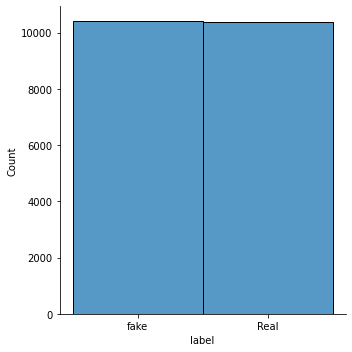

In [42]:
import seaborn as sn
DF = df.copy()
replace = {0:'Real',1:'fake'}
DF['label'] = DF['label'].replace(replace)
sn.displot(DF['label'])

This is definitely not an **imbalanced dataset**, so accuracy metric will be a good measure for evaluation.

# Using Multinomail Naive-Bayes & Passive-Aggresive Classifier (ML approach)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [ ]:
import nltk
import re

In [ ]:
df = df.dropna()

In [ ]:
df.reset_index(inplace=True)

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lr = WordNetLemmatizer()
ps = PorterStemmer()

# (i) Using title as feature

In [ ]:
corpus = []
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['title'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(str(word)) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
corpus

In [ ]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
y = df.label

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
model = naive_bayes.fit(x_train,y_train)

In [ ]:
from sklearn import metrics
y_pred = model.predict(x_test)
cm = metrics.confusion_matrix(y_test,y_pred)
import matplotlib.pyplot as plt
import seaborn as sn

Model: Multinomial Naive-Bayes
Accuracy: 0.9017499088589136


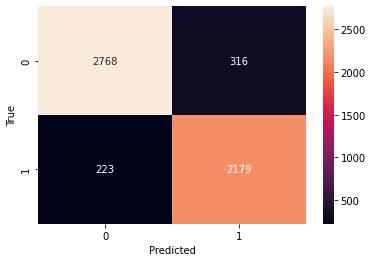

In [ ]:
print('Model: Multinomial Naive-Bayes')
print('Accuracy:',model.score(x_test,y_test))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()   

In [ ]:
# PassiveAgressiveClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
Passive_Aggressive_model = PassiveAggressiveClassifier()
model12 = Passive_Aggressive_model.fit(x_train,y_train)
y_pred_PAC = model12.predict(x_test)
CM = metrics.confusion_matrix(y_test, y_pred_PAC)

Model: Passive-Agressive Classifier
Accuracy: 0.9163324826831936


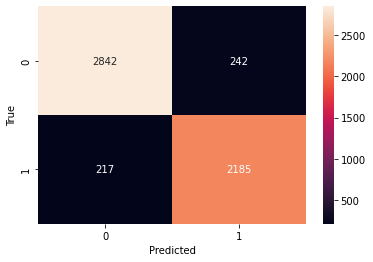

In [ ]:
print('Model: Passive-Agressive Classifier')
print('Accuracy:',model12.score(x_test,y_test))
sn.heatmap(CM,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# (ii) Using text as a feature instead of title

In [ ]:
corpus1 = []
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(str(word)) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus1.append(review)

In [ ]:
corpus1

In [ ]:
cv1 = TfidfVectorizer(max_features=5000,ngram_range=(1,3))

In [ ]:
x = cv1.fit_transform(corpus1).toarray()

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
NB = MultinomialNB()
model2= NB.fit(X_train,Y_train)

In [ ]:
model2.score(X_test,Y_test)

0.9017499088589136

In [ ]:
Y_pred = model2.predict(X_test)
cm = metrics.confusion_matrix(Y_test,Y_pred)

Model: Multinomial Naive-Bayes Classifier
Accuracy: 0.9017499088589136


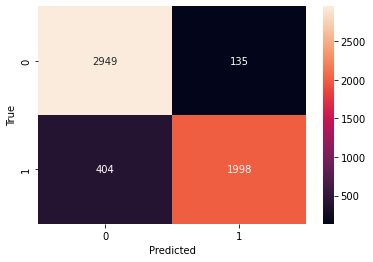

In [ ]:
print('Model: Multinomial Naive-Bayes Classifier')
print('Accuracy:',model2.score(X_test,Y_test))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# PassiveAgressiveClassifier
Passive_Aggressive_model = PassiveAggressiveClassifier()
model22 = Passive_Aggressive_model.fit(X_train,Y_train)
Y_preD = model22.predict(X_test)
CM1 = metrics.confusion_matrix(Y_test, Y_preD)

Model: Passive-Agressive Classfier
Accuracy: 0.949690120306234


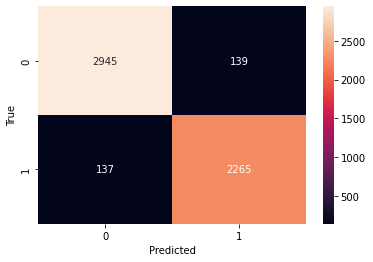

In [ ]:
print('Model: Passive-Agressive Classfier')
print('Accuracy:',model22.score(X_test,Y_test))
sn.heatmap(CM1,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Using LSTM & Bi-Directional Neural Networks (Deep Learning)

In [ ]:
y_f = df.label

In [ ]:
y_f.shape

(18285,)

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

#(i) Using title for training the model

In [ ]:
voc_size=5000

In [ ]:
one_hot_rep = [one_hot(words,voc_size) for words in corpus] 

In [ ]:
one_hot_rep

In [ ]:
sent_length = 20
embedded_docs = pad_sequences(one_hot_rep, padding = 'pre', maxlen=sent_length)

In [ ]:
embedded_docs

array([[   0,    0,    0, ...,  126,  268,  705],
       [   0,    0,    0, ..., 1928, 4837, 3523],
       [   0,    0,    0, ..., 1551, 1963, 2393],
       ...,
       [   0,    0,    0, ..., 3362, 3506,  142],
       [   0,    0,    0, ...,  392, 2168, 4031],
       [   0,    0,    0, ..., 2853, 4167,  348]], dtype=int32)

In [ ]:
embedding_vec_features = 40

In [ ]:
# LSTM
model = Sequential()
model.add(Embedding(voc_size,embedding_vec_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1, activation='tanh'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               56400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import numpy as np
x_final = np.array(embedded_docs)
y_final = np.array(y_f)

In [ ]:
xf_train,xf_test,yf_train,yf_test = train_test_split(x_final,y_final,test_size=0.3,random_state=0)

In [ ]:
model.fit(xf_train,yf_train,validation_data=(xf_test,yf_test),epochs=10,batch_size=64)

Epoch 1/10
200/200 [==============================] - 11s 42ms/step - loss: 0.3808 - accuracy: 0.8270 - val_loss: 0.1973 - val_accuracy: 0.9169
Epoch 2/10
200/200 [==============================] - 7s 34ms/step - loss: 0.1559 - accuracy: 0.9421 - val_loss: 1.0047 - val_accuracy: 0.6983
Epoch 3/10
200/200 [==============================] - 7s 35ms/step - loss: 0.1357 - accuracy: 0.9509 - val_loss: 0.2653 - val_accuracy: 0.9242
Epoch 4/10
200/200 [==============================] - 7s 35ms/step - loss: 0.0927 - accuracy: 0.9707 - val_loss: 0.2899 - val_accuracy: 0.9253
Epoch 5/10
200/200 [==============================] - 7s 35ms/step - loss: 0.0638 - accuracy: 0.9815 - val_loss: 0.3287 - val_accuracy: 0.9254
Epoch 6/10
200/200 [==============================] - 7s 35ms/step - loss: 0.0504 - accuracy: 0.9906 - val_loss: 0.5752 - val_accuracy: 0.9140
Epoch 7/10
200/200 [==============================] - 7s 35ms/step - loss: 0.0387 - accuracy: 0.9945 - val_loss: 0.4879 - val_accuracy: 0.922

Using an **Activation function** as **'tanh'** will give all values in the range **[-1,1]**. So, we have to set a thersold of **0**, thus values greater than **0** will be classified as **1** and vice versa. 

In [ ]:
yf_pred = model.predict(xf_test)
classes_x=np.where(yf_pred > 0, 1,0)

# Using LSTM:

Model: LSTM
Accuracy: 0.917243893547211


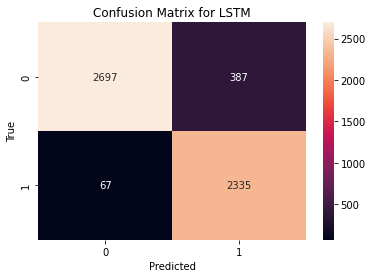

In [ ]:
print('Model: LSTM')
print('Accuracy:', metrics.accuracy_score(yf_test,classes_x))
Cm = metrics.confusion_matrix(yf_test,classes_x)
sn.heatmap(Cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for LSTM')
plt.show()

In [ ]:
from tensorflow.keras.layers import Bidirectional, Dropout

In [ ]:
# Bidirectional LSTM
model1 = Sequential()
model1.add(Embedding(voc_size,embedding_vec_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1, activation='tanh'))
model1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 20, 40)            200000    
                                                                 
 bidirectional_3 (Bidirectio  (None, 200)              112800    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.fit(xf_train,yf_train,validation_data=(xf_test,yf_test),epochs=10,batch_size=64 )

Epoch 1/10
200/200 [==============================] - 15s 56ms/step - loss: 0.3680 - accuracy: 0.8361 - val_loss: 0.2056 - val_accuracy: 0.9182
Epoch 2/10
200/200 [==============================] - 10s 50ms/step - loss: 0.1614 - accuracy: 0.9434 - val_loss: 0.2280 - val_accuracy: 0.9218
Epoch 3/10
200/200 [==============================] - 10s 51ms/step - loss: 0.1170 - accuracy: 0.9624 - val_loss: 0.3055 - val_accuracy: 0.9138
Epoch 4/10
200/200 [==============================] - 10s 51ms/step - loss: 0.0922 - accuracy: 0.9727 - val_loss: 0.2588 - val_accuracy: 0.9174
Epoch 5/10
200/200 [==============================] - 10s 51ms/step - loss: 0.0782 - accuracy: 0.9799 - val_loss: 0.3984 - val_accuracy: 0.9163
Epoch 6/10
200/200 [==============================] - 10s 51ms/step - loss: 0.0579 - accuracy: 0.9884 - val_loss: 0.6687 - val_accuracy: 0.9151
Epoch 7/10
200/200 [==============================] - 10s 51ms/step - loss: 0.2199 - accuracy: 0.9514 - val_loss: 0.4492 - val_accuracy:

In [ ]:
Y_pred = model.predict(xf_test)
classes_X = np.where(y_pred>0,1,0)

# Using Bi-directional LSTM:

Model: Bidirectional LSTM
Accuracy: 0.9017499088589136


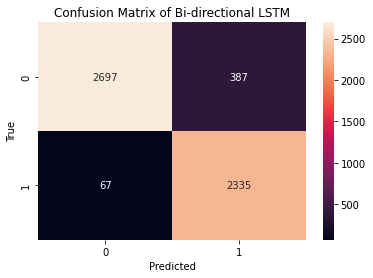

In [ ]:
print('Model: Bidirectional LSTM')
print('Accuracy:', metrics.accuracy_score(yf_test,classes_X))
Cm = metrics.confusion_matrix(yf_test,classes_x)
sn.heatmap(Cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Bi-directional LSTM')
plt.show()

#Using text for training-testing the model

In [ ]:
one_hot_R = [one_hot(word,150000) for word in corpus1]

In [ ]:
one_hot_R

In [ ]:
corpus1

In [ ]:
len(max(corpus1, key=len))

72006

In [ ]:
len(max(corpus,key=len))

299

In [ ]:
sent_length1 = 4820
embedded_doc = pad_sequences(one_hot_R, padding = 'pre', maxlen=sent_length1)

In [ ]:
embedded_doc

array([[     0,      0,      0, ..., 133591,  74493, 103991],
       [     0,      0,      0, ...,  29073,  82674,  46572],
       [     0,      0,      0, ...,  76239,  46437,  34083],
       ...,
       [     0,      0,      0, ...,  95551, 138901,  79104],
       [     0,      0,      0, ..., 148216,  88451, 139622],
       [     0,      0,      0, ..., 111728, 122620,  40370]], dtype=int32)

In [ ]:
X_final = np.array(embedded_doc)
Y_final = np.array(y_f)

In [ ]:
Xf_train,Xf_test,Yf_train,Yf_test = train_test_split(X_final,Y_final,test_size=0.3,random_state=0)

In [ ]:
# LSTM
embedding_vec_features = 9640
model21 = Sequential()
model21.add(Embedding(voc_size,embedding_vec_features,input_length=sent_length1))
model21.add(LSTM(500))
model21.add(Dense(1, activation='tanh'))
model21.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model21.fit(Xf_train,Yf_train,validation_data=(Xf_test,Yf_test),epochs=10,batch_size=64)

Epoch 1/10


InvalidArgumentError: ignored